## 머신러닝
# 선형회귀 (Linear Regression)

- 회귀는 데이터가 주어졌을 때, **실수값**인 타겟값(또는 목표값)을 예측하는 방법이다.

나이 | 성별 | 키  | 몸무계
-----|------|-----|-------
35   | 남   | 175 | 67
...  | ...  | ... | ...
27   | 여   | 163 | 52

- 위와 같은 데이터가 주어졌을 때, 키(데이터)에 따른 몸무계(타겟값)를 예측하는 것은 회귀 문제이다.
- 회귀 중에서도, 직선 또는 곧은 평면(굽은 평면이 아님)으로 타겟값을 예측하는 것을 **선형회귀** 라고 한다. 아래 그림에서 직선으로 예측한 경우에 해당한다.

<img src="ch02_02.png" />
<p style="text-align: center;">(출처 : wikipedia - overfitting)</p>

- 속성이 하나 뿐일 때는 위와 같이 직선으로 표현할 수 있지만 속성이 2개일 때는 곧은 평면, 3개 이상에서는 초평면으로 표현한다.

<img src="ch02_03.jpg" />
<p style="text-align: center;">(출처 : https://www.dataquest.io/blog/statistical-learning-for-predictive-modeling-r/)</p>

- 선형회귀에서 굳이 타겟값을 별도로 구분했지만, 다르게 표현하면 타겟값을 포함한 모든 속성의 상관관계를 평면으로 표현한 것으로 이해할 수 있다.
- 아래에서 Iris 데이터를 가지고 선형회귀를 적용해 보겠다.

### 속성 3개로 나머지 속성값 예측하기
- 아이리스 데이터 불러오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

- 앞의 속성 세가지를 가지고 마지막 속성인 Petal Width 값을 예측해 보자

In [2]:
X = iris.data[:,:3]
y = iris.data[:,3]

- 학습용과 테스트용 으로 데이터 분리하기

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

pred_y = model.predict(X_test)
display(y_test, pred_y)

model.score(X_test, y_test)

array([1.3, 2.3, 0.2, 0.2, 2.3, 0.4, 0.2, 0.2, 0.3, 1.3, 1.4, 0.2, 1.5,
       1.3, 0.1, 2.1, 1.8, 1.8, 1.3, 0.2, 1.8, 0.5, 0.3, 1.4, 1.5, 2.5,
       0.1, 0.2, 1.4, 0.2, 1.8, 1.9, 0.2, 1. , 1.3, 1.8, 1.1, 1.3])

array([1.26352728, 1.75774873, 0.33215367, 0.23960533, 2.15367193,
       0.16628634, 0.12451726, 0.17210641, 0.32374373, 1.2075783 ,
       1.33423636, 0.05117822, 1.74941897, 1.12916978, 0.21131568,
       2.04119377, 1.76932874, 1.73269931, 1.23012805, 0.27298451,
       1.96539516, 0.31799381, 0.20292579, 1.47687351, 1.6286311 ,
       2.34200883, 0.11042756, 0.23378526, 1.57265205, 0.22548556,
       1.62023118, 1.83942755, 0.13547698, 1.30593669, 1.42676465,
       2.03865402, 0.83161499, 1.41840482])

0.952866367206693

(-0.029856630824372773,
 2.6298566308243725,
 -0.07853990676632204,
 2.471726963288465)

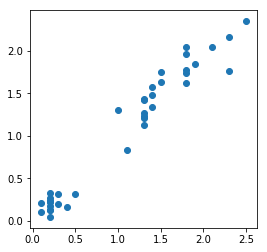

In [8]:
plt.scatter(y_test, pred_y)
plt.axis('scaled')

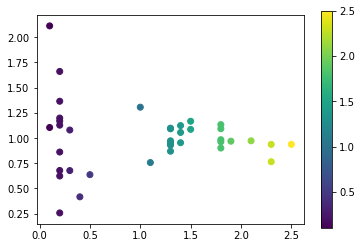

In [15]:
plt.scatter(y_test, pred_y/y_test, c=y_test)
plt.axis('scaled')
plt.colorbar()

- 선형회귀 모델 불러와 학습하기
- 선형회귀 모델 => LinearRegression
- 학습 => fit()

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

- 학습결과 평가하기 (테스트 데이터 사용)

In [17]:
model.score(X_test, y_test) # 1에 가까울 수록 좋은 결과이다

0.952866367206693

In [18]:
pred_y = model.predict(X_test)
display(pred_y[:10], y_test[:10])

array([1.26352728, 1.75774873, 0.33215367, 0.23960533, 2.15367193,
       0.16628634, 0.12451726, 0.17210641, 0.32374373, 1.2075783 ])

array([1.3, 2.3, 0.2, 0.2, 2.3, 0.4, 0.2, 0.2, 0.3, 1.3])

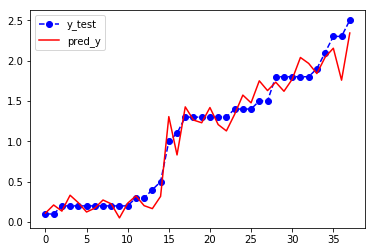

In [20]:
idx = np.argsort(y_test)

plt.plot(y_test[idx], 'bo--')
plt.plot(pred_y[idx], 'r-')
plt.legend(['y_test', 'pred_y'])

- 선형회귀의 결과 인자 확인하기
- coef_ => 각 속성의 가중치

In [23]:
model.coef_ # u = ax + by + cz + d => (a,b,c) 와 비슷한 개념

array([-0.22882722,  0.23629134,  0.52358256])

In [24]:
model.intercept_ # u = ax + by + cz + d => d 와 비슷한 개념

-0.16262978047454046

### 산점도로 속성들 간의 비례 관계 확인하기

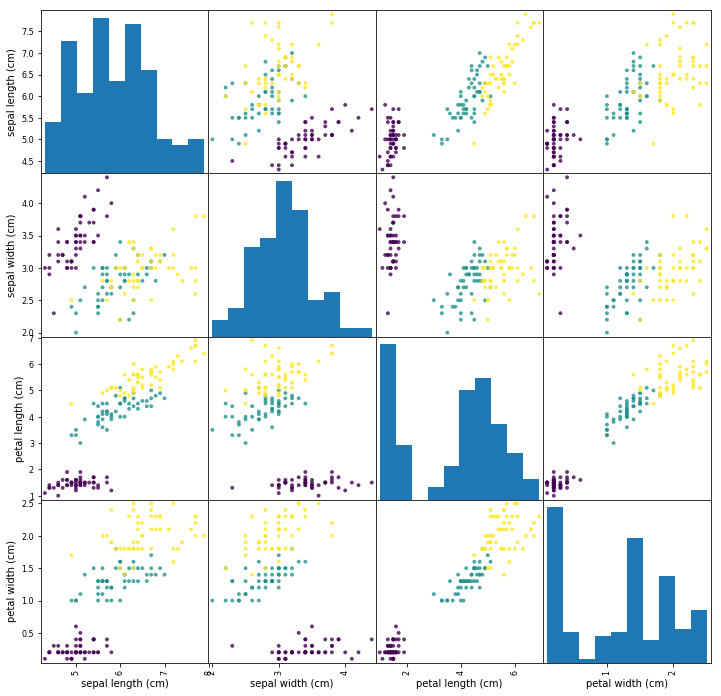

In [2]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, s=60, alpha=0.8, figsize=[12,12])
pass

- 위의 산점도에서 각 속성들 간의 상관관계를 짐작해 볼 수 있다.
- 위의 그림은 pandas 를 이용했지만 numpy 로 직접 그림을 그려보자.

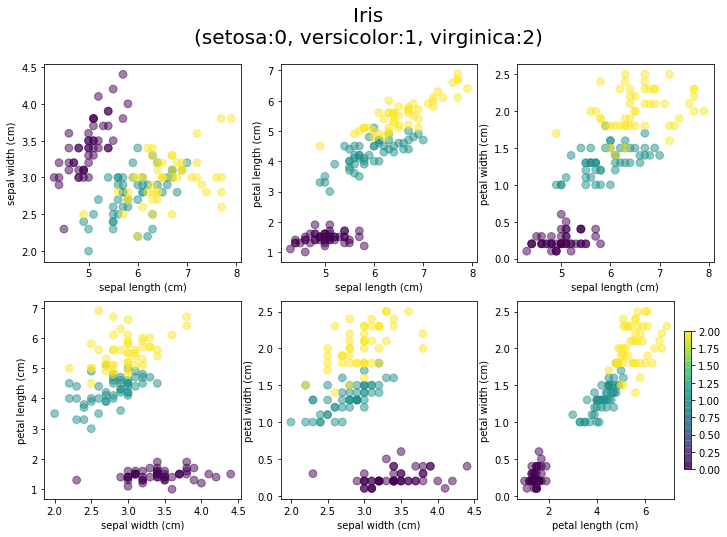

In [13]:
fig=plt.figure(figsize=[12,8])
fig.suptitle('Iris\n(setosa:0, versicolor:1, virginica:2)',fontsize=20)
count=0

for i in range(3):
    for j in range(i+1,4):
        count+=1
        plt.subplot(2,3,count)
        plt.scatter(iris.data[:,i],iris.data[:,j],c=iris.target,s=60,alpha=0.5)
        plt.xlabel(iris.feature_names[i])
        plt.ylabel(iris.feature_names[j])
        
plt.colorbar(shrink=0.7)

- 위의 산점도에서 가장 크게 선형관계를 가지는 것은 petal length 와 petal width 이다.
- 아래에서 이 두 속성간의 상관관계를 직선으로 표현해 보자.
>참고 : 이 경우 petal length 가 데이터가 되고, petal width 가 타겟값이 된다. 반대로 적용해도 결과는 같다.

In [36]:
X = iris.data[:,[0]]
y = iris.data[:,1]

model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.011961632834767588

In [42]:
w = model.coef_[0]
b = model.intercept_
w,b

(-0.057268233797164815, 3.3886373794881)

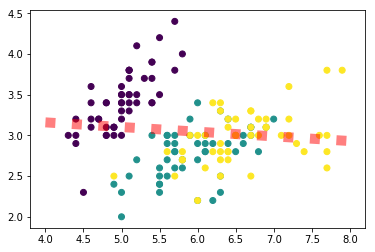

In [45]:
plt.scatter(X, y, c=iris.target)
plt.plot([4,8], [4*w+b,8*w+b], 'r:', linewidth=10, alpha=0.5)

In [29]:
X = iris.data[:50,[0]]
y = iris.data[:50,1]

model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.5576809258922097

In [30]:
model.coef_, model.intercept_

(array([0.80723367]), -0.623011727604216)

In [31]:
X = iris.data[50:,[0]]
y = iris.data[50:,1]

model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.3067551932220538

In [32]:
model.coef_, model.intercept_

(array([0.27804192]), 1.1309015164752294)